## Sales Analysis

In [1]:
import pandas as pd
from pathlib import Path
import os, glob
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import combinations
from collections import Counter

csv_path = Path("E:\DeepLearning\pandas\Real_word_task\SalesAnalysis\Sales_Data")

## Data Clean

#### Merging 12 months data in to a single file

In [2]:
for dirpath, dirname, filenames in os.walk(csv_path):
        print(f"There are {len(filenames)} file in '{dirpath}'.")

There are 12 file in 'E:\DeepLearning\pandas\Real_word_task\SalesAnalysis\Sales_Data'.


In [3]:
os.chdir(csv_path)
file_path_list = glob.glob(f"{csv_path}\\*")
file_path_list

['E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_August_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_December_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_February_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_January_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_July_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_June_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_March_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_May_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAnalysis\\Sales_Data\\Sales_November_2019.csv',
 'E:\\DeepLearning\\pandas\\Real_word_task\\SalesAna

In [4]:
file = [file for file in os.listdir()]

In [5]:
file

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [6]:
all_data = pd.DataFrame() # empty pd
for i in range(len(file_path_list)):
    df = pd.read_csv(file_path_list[i])
    all_data = pd.concat([all_data, df])

all_data.count()

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [7]:
all_data.to_csv(f"{csv_path}\\all_data.csv", index=False)

## What was the best month for sales? How much was earned that month?

In [2]:
df = pd.read_csv(f"{csv_path}\\all_data.csv")
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


#### clean data first(NaN)

In [3]:
# we hava NaN data, and the header data(which come from the concat)
df.sort_values(['Order Date'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
73891,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
74701,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
76054,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
76708,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
76061,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# filter NaN rows
nan_df = df[df.isna().any(axis=1)]
nan_df.__len__()

545

In [5]:
df = df.dropna(how='any')
nan_df = df[df.isna().any(axis=1)]
nan_df.__len__()

0

In [6]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.sort_values(['Order Date']) # 185950 # 355??

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
73891,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
74701,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
76054,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
76708,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
76061,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
32308,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001"
33264,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016"
52781,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016"
45172,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001"


In [7]:
# convert column to correct datatype
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) # make int
df['Price Each'] = pd.to_numeric(df['Price Each']) # make float

#### aug data with additional cols

In [8]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [9]:
# month col
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
# cannot convert float NaN to integer
# invalid literal for int() with base 10: 'Or'
df.sort_values(['Month'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1
70773,144300,Apple Airpods Headphones,1,150.00,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1
70770,144297,Flatscreen TV,1,300.00,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1
...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",12
47163,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",12
47164,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",12
47142,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",12


#### add sales cols

In [10]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.sort_values(['Sales'])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
89015,234149,AAA Batteries (4-pack),1,2.99,07/20/19 12:35,"460 11th St, Los Angeles, CA 90001",7,2.99
119309,175423,AAA Batteries (4-pack),1,2.99,03/11/19 13:45,"240 2nd St, Boston, MA 02215",3,2.99
150216,291302,AAA Batteries (4-pack),1,2.99,11/09/19 19:12,"747 Adams St, Boston, MA 02215",11,2.99
119306,175420,AAA Batteries (4-pack),1,2.99,03/09/19 12:22,"587 Elm St, San Francisco, CA 94016",3,2.99
172716,276461,AAA Batteries (4-pack),1,2.99,10/12/19 13:52,"739 Madison St, San Francisco, CA 94016",10,2.99
...,...,...,...,...,...,...,...,...
76338,149611,ThinkPad Laptop,2,999.99,01/31/19 17:47,"850 6th St, New York City, NY 10001",1,1999.98
92026,210292,Macbook Pro Laptop,2,1700.00,06/08/19 09:00,"953 Ridge St, San Francisco, CA 94016",6,3400.00
4717,181069,Macbook Pro Laptop,2,1700.00,04/27/19 21:01,"668 Park St, San Francisco, CA 94016",4,3400.00
5219,181544,Macbook Pro Laptop,2,1700.00,04/22/19 12:48,"731 11th St, New York City, NY 10001",4,3400.00


In [20]:
df = df.sort_values(['Sales'])
df.to_csv(f"{csv_path}\\all_data_cleaned.csv")

In [11]:
rst = df.groupby('Month')['Sales'].sum()

In [12]:
rst

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [13]:
rst_y = [y for y in rst]

In [14]:
rst_y

[1822256.73,
 2202022.42,
 2807100.38,
 3390670.24,
 3152606.75,
 2577802.2600000002,
 2647775.7600000002,
 2244467.88,
 2097560.13,
 3736726.88,
 3199603.2,
 4613443.34]

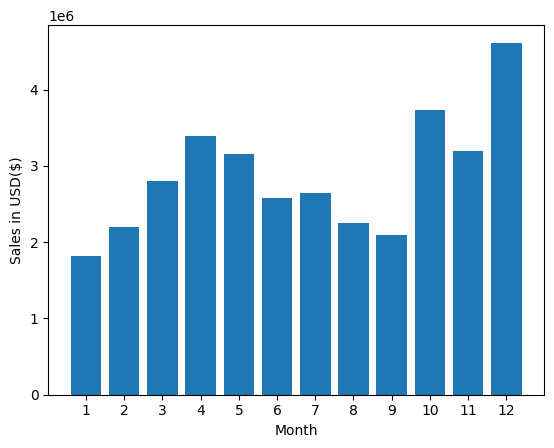

In [17]:

months = range(1, 13)

plt.bar(months, rst_y)
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month")
plt.show()

## What city had the highest number of sales

In [22]:
df = pd.read_csv(f"{csv_path}\\all_data_cleaned.csv")
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,93428.643060,230417.569379,1.124383,184.399735,7.059140,185.490917
std,53938.250088,51512.737110,0.442793,332.731330,3.502996,332.919771
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000
25%,46716.250000,185831.250000,1.000000,11.950000,4.000000,11.950000
50%,93434.500000,230367.500000,1.000000,14.950000,7.000000,14.950000
75%,140146.750000,275035.750000,1.000000,150.000000,10.000000,150.000000
max,186849.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000


In [23]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,89015,234149,AAA Batteries (4-pack),1,2.99,07/20/19 12:35,"460 11th St, Los Angeles, CA 90001",7,2.99
1,129479,202633,AAA Batteries (4-pack),1,2.99,05/01/19 20:49,"473 10th St, Austin, TX 73301",5,2.99
2,86533,231769,AAA Batteries (4-pack),1,2.99,07/31/19 13:10,"128 12th St, Austin, TX 73301",7,2.99
3,129750,202892,AAA Batteries (4-pack),1,2.99,05/22/19 22:18,"472 Walnut St, Boston, MA 02215",5,2.99
4,3139,179560,AAA Batteries (4-pack),1,2.99,04/19/19 01:58,"233 Madison St, Austin, TX 73301",4,2.99


In [24]:
# lambda 
def double(x):
    return x * 2

doubles = lambda x: x*2
multip = lambda x, y: x*y
age_check = lambda age: True if age >= 18 else False

# input some params
# return the expression result after :

In [28]:
# use .apply() to get address/location
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] # get the region

# apply some funcs/change to the data at Purchase Address column
df['Location'] = df['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

# df.drop(colunm='xxx', inplace=True) # replace old dataframe

In [29]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location
0,89015,234149,AAA Batteries (4-pack),1,2.99,07/20/19 12:35,"460 11th St, Los Angeles, CA 90001",7,2.99,Los Angeles CA
1,129479,202633,AAA Batteries (4-pack),1,2.99,05/01/19 20:49,"473 10th St, Austin, TX 73301",5,2.99,Austin TX
2,86533,231769,AAA Batteries (4-pack),1,2.99,07/31/19 13:10,"128 12th St, Austin, TX 73301",7,2.99,Austin TX
3,129750,202892,AAA Batteries (4-pack),1,2.99,05/22/19 22:18,"472 Walnut St, Boston, MA 02215",5,2.99,Boston MA
4,3139,179560,AAA Batteries (4-pack),1,2.99,04/19/19 01:58,"233 Madison St, Austin, TX 73301",4,2.99,Austin TX


In [31]:
rst2 = df.groupby('Location')['Sales'].sum()
rst2

Location
 Atlanta GA          2795498.58
 Austin TX           1819581.75
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452570.80
 New York City NY    4664317.43
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262203.91
 Seattle WA          2747755.48
Name: Sales, dtype: float64

In [35]:
sales2 = [x for x in rst2]
sales2

[2795498.58,
 1819581.75,
 3661642.0100000002,
 2767975.4,
 5452570.8,
 4664317.43,
 449758.27,
 1870732.34,
 8262203.91,
 2747755.48]

<Axes: xlabel='Location'>

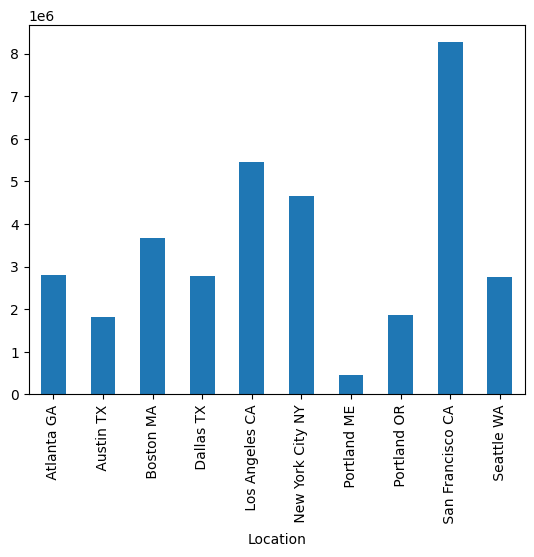

In [34]:
rst2.plot(kind='bar')

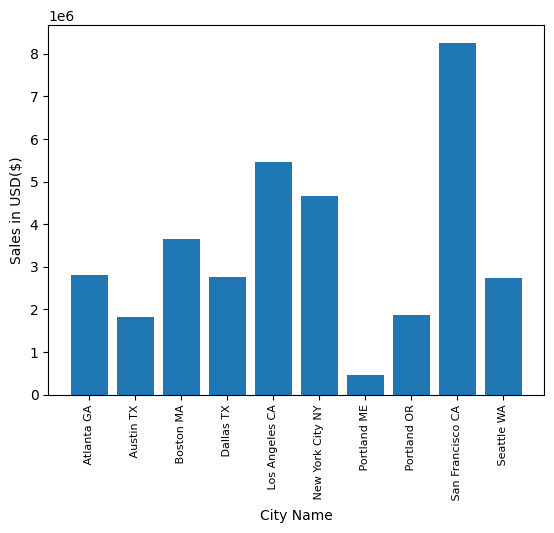

In [40]:
city = [city for city, df in df.groupby('Location')]
# df['Location'].unique() # the order is wrong

plt.bar(city, sales2)
plt.xticks(city, rotation='vertical', size=8)
plt.ylabel("Sales in USD($)")
plt.xlabel("City Name")
plt.show()

In [41]:
df.to_csv(f'{csv_path}\\all_data_sales+cities.csv')

## What time should we display advertisements to maximize likelihood of customer's buying product?

In [11]:
df = pd.read_csv(f'{csv_path}\\all_data_sales+cities.csv', index_col=['index'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location
index,,,,,,,,,
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2004/7/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2004/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [14]:
# convert order date into datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location
index,,,,,,,,,
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [16]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location,Hour,Minute
index,,,,,,,,,,,
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


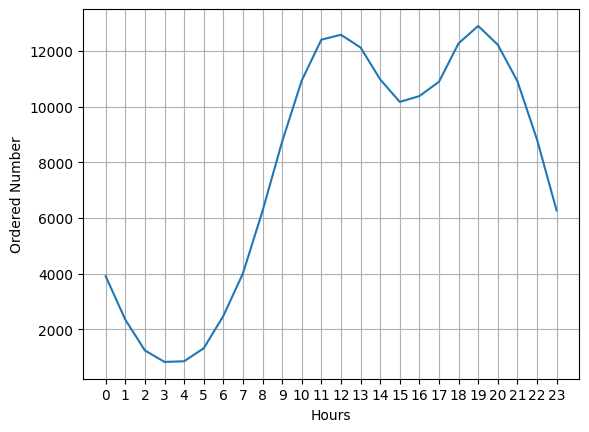

In [24]:
hours = [h for h, df in df.groupby('Hour')] # 0-23

plt.plot(hours, df.groupby(['Hour'])['Sales'].count())
plt.xticks(hours)
plt.grid()

plt.xlabel('Hours')
plt.ylabel('Ordered Number')

plt.show()

In [26]:
df.groupby(['Hour'])['Sales'].count()
df.to_csv(f'{csv_path}\\all_data_sales+cities+time.csv', index=False)

## What products are most often sold together?

In [6]:
df = pd.read_csv(f'{csv_path}\\all_data_sales+cities+time.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [3]:
# same order id will indicates the "sold together"
df = df[df['Order ID'].duplicated(keep=False)] # check duplicate
df.head() # this df are much smaller now, since we ignored all order that only has 1 product

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location,Hour,Minute
2,176560,Google Phone,1,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
17,176574,Google Phone,1,600.00,2004-03-19 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42
18,176574,USB-C Charging Cable,1,11.95,2004-03-19 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42
29,176585,Bose SoundSport Headphones,1,99.99,2004-07-19 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31


In [7]:
df['Grouped Order'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location,Hour,Minute,Grouped Order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,USB-C Charging Cable
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,Bose SoundSport Headphones
2,176560,Google Phone,1,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,Wired Headphones


In [8]:
df.to_csv(f'{csv_path}\\all_data_sales+cities+time+order.csv', index=False)

In [9]:
df = df[['Order ID', 'Grouped Order']].drop_duplicates()
df.head()

,Order ID,Grouped Order
0,176558,USB-C Charging Cable
1,176559,Bose SoundSport Headphones
2,176560,"Google Phone,Wired Headphones"
4,176561,Wired Headphones
5,176562,USB-C Charging Cable


In [10]:
# count pair result
counter = Counter()
for r in df['Grouped Order']: # Google Phone,Wired Headphones
    row_list = r.split(',')
    counter.update(Counter(combinations(row_list, 2)))

for k, v in counter.most_common(30):
    print(k, v)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

## What product sold the most, and why do you think it sold the most?

In [3]:
df = pd.read_csv(f'{csv_path}\\all_data_sales+cities+time.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Location,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2004-07-19 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2004-12-19 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [6]:
df_ = df.groupby('Product')
df__ = df_.sum()['Quantity Ordered']

<Axes: xlabel='Product'>

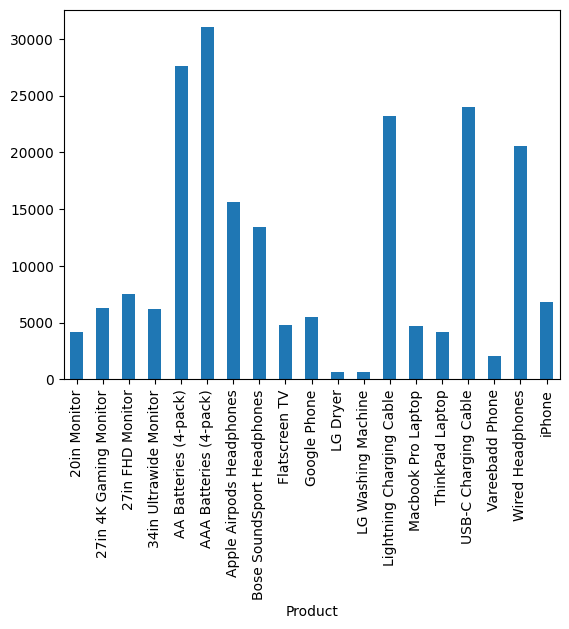

In [8]:
df__.plot(kind='bar')

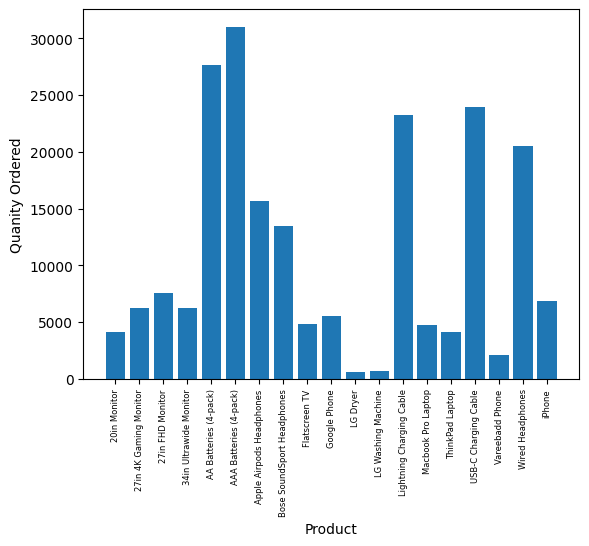

In [16]:
products = [p for p, _ in df_]

plt.bar(products, df__)
plt.xticks(products, rotation='vertical', size=6)
plt.ylabel('Quanity Ordered')
plt.xlabel('Product')
plt.show()

In [21]:
prices = df.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\ReThGe\AppData\Local\Temp\ipykernel_14296\2166213188.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=6)


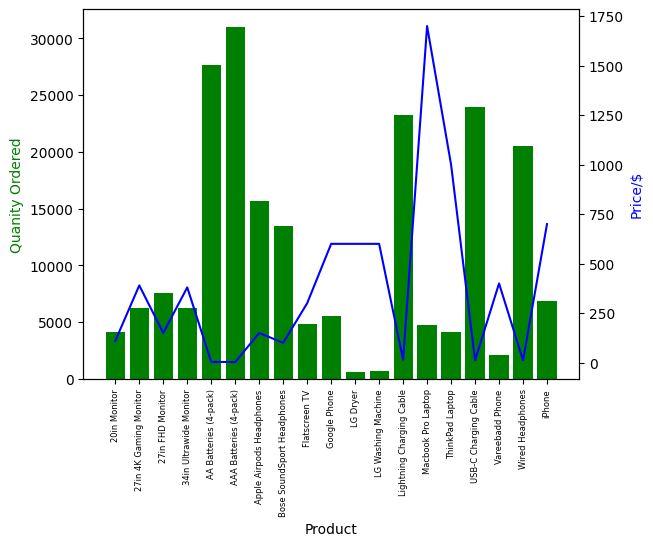

In [36]:
# overlay to sales-products image
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, df__, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quanity Ordered', color='g')
ax2.set_ylabel('Price/$', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=6)
plt.show()